In [63]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import numpy as np
from hyper import predict

In [64]:
reaction_mech = {
        'Schirmeister': '../../KM/2009_Schirmeister_EDC/chem_annotated_irreversible.cti'
    }
Tin=350
Pin = 12.4
CCl4 = 1000
raw_T_list = [Tin]
x = [0,4,7,10,13,18,22]
params={'t00': 88.49998517024153, 't04': 35.10448840568699, 't07': 21.023993662366614, 't10': 2.8973038546081455, 't13': 0.44117869582259805, 't18': 1.332990748044338}


# 12.4 350
# params = {'t00': 68.59434991088177, 't04': 25.15770719863841, 't07': 15.94066607777022, 't10': 2.9522635630781706, 't13': 0.4418700098815036, 't18': 1.3295334256469555}

# params = {'t00': 87.88967332701257, 't04': 36.598402617551976, 't07': 14.038647134521124, 't10': 1.6871436070966268, 't13': 1.9304271179067618, 't18': 2.505817543564093}
# for i in range(1,23):
#     T_list[i] = T_list[i-1]+params[f"t{i}"]
for _, value in params.items():
    raw_T_list.append(round((raw_T_list[-1]+value), 2))
cs = CubicSpline(x,raw_T_list)
T_list = np.round(cs(range(23)),decimals=2)
# T_l = np.array(T_list)
print(T_list)
X = predict(reaction_mech, T_list, Pin, CCl4, 53,
                100, len(T_list)-1, 18, 3.14 * (262 / 1000) ** 2 / 4)

[350.   378.42 402.24 422.06 438.5  452.16 463.66 473.6  482.39 489.61
 494.62 497.08 497.71 497.52 497.35 497.33 497.45 497.67 497.96 498.3
 498.65 498.99 499.29]


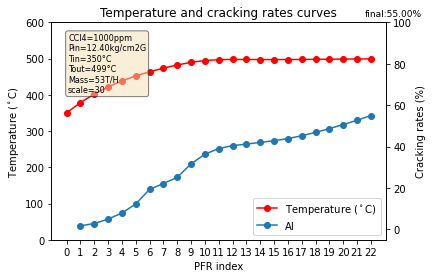

In [65]:
fig, ax1 = plt.subplots()
scale = 30
# print("Schi cracking rates")
# print(results['Schirmeister']*100)
ndata=range(23)
ln = ax1.plot(ndata, T_list, color='r',
                marker='o', label='Temperature ($^\circ$C)')
ax1.set_ylabel('Temperature ($^\circ$C)')
ax1.set_ylim(0, 600)
# textstr = '\n'.join(
#     (r'CCl4=%dppm' % (CCl4_X_0),
#      r'Pin=%.2fkg/cm2G' % (pressure_0),
#      r'Tin=%d°C' % (T_list[0]),
#      r'Mass=%dT/H' % (mass_flow_rate),
#      r'scale=texas'
#      )
# )
textstr = '\n'.join(
    (r'CCl4=%dppm' % (CCl4),
        r'Pin=%.2fkg/cm2G' % (Pin),
        r'Tin=%d°C' % (T_list[0]),
        r'Tout=%d°C' % (T_list[-1]),
        r'Mass=%dT/H' % (53),
        #  r'scale=texas'
        r'scale=%d' % (scale)
        )
)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
            fontsize=8, verticalalignment='top', bbox=props)
ax2 = ax1.twinx()
lns = ln
import itertools
marker = itertools.cycle(('D', 'x', '.', 'o', '*'))
# for label in results.keys():
#     cracking_rates = [
#         i * 100 for i in results[label]['cracking_rates']]
#     lns += ax2.plot(range(ndata), cracking_rates,
#                     marker=next(marker), label=label)
cracking_rates = [
        i  for i in X]
lns += ax2.plot(ndata[1:], cracking_rates,
                    marker='o', label='AI')
ax2.set_ylabel('Cracking rates (%)')
ax2.set_ylim(-5, 100)
text_crack = f"final:{(X[-1]):.2f}%"
fig.text(0.85, 0.90, text_crack, fontsize=9)
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='lower right', frameon=True)

plt.title('Temperature and cracking rates curves')
ax1.set_xlabel('PFR index')
plt.xticks(np.arange(min(ndata),max(ndata)+1,1))
plt.show()

